# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

Implement code to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# TODO: Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# TODO: Import supplementary visualizations code visuals.py
import visuals as vs

# TODO: Pretty display for notebooks
%matplotlib inline

# TODO: Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Implement code to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# TODO: Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [112, 244, 305]

# TODO: Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,19046,2770,2469,8853,483,2708
1,6202,7775,10817,1183,3143,1970
2,243,12939,8852,799,3909,211


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 

**Answer:** 
1.	First customer seems to be a big fresh market. This customer's "Fresh" purchase is much higher that mean of "Fresh" value, while its "Milk", "Grocery" are almost half the mean values of these features. Its "Detergents_Paper" purchase is much less than the mean and "Frozen" purchase value is very close to 25% value. So, this customer should be a big fresh market, probably with a lot of organic stuff that are more expensive with a minor focus on Grocery stuff.
2.	Second customer seems to be a grocery store. This customer's "Fresh" purchase is almost half the mean value which means it provides regular(Conventionally grown) fruits and vegetables. However, all of the other values are higher than the mean values which is more likely a regular grocery store.
3.	Third customer reminds me of something like a hotel that needs a lot of high quality fresh foods (1.5 times the average) and a very low consuming of "Frozen" foods. The "Milk" and "Grocery" are very close to the mean values, which makes sense. Also, the higher consuming of "Detergents_Paper" makes sense for a hotel, too.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
new_data.drop(['Delicatessen'], axis=1, inplace = True)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# TODO: Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size = 0.25, random_state = 1)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print (score)

-0.4291251956585451


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
1.	I attempted to predict 'Grocery' feature in the first place
2.	The prediction score was 0.79.
3.	No, this feature doesn't seem to be necessary for identifying customers' spending habits. Then, I tried predicting other features one by one, and these were the results: Fresh: -0.92, Milk: 0.51, Frozen: -0.64, Detergents_Paper: 0.81, Delicatessen: -0.42. So, I guess 'Grocery' feature is one of the least necessary features in this problem, since it's one of the easiest to predict in this model. Here, 'Delicatessen' has the least score. Therefore, it is the most important feature to consider when considering relevance.


### Visualize Feature Distributions
To get a better understanding of the dataset, construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix  may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Implement code to produce a scatter matrix.

C:\Users\nahal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


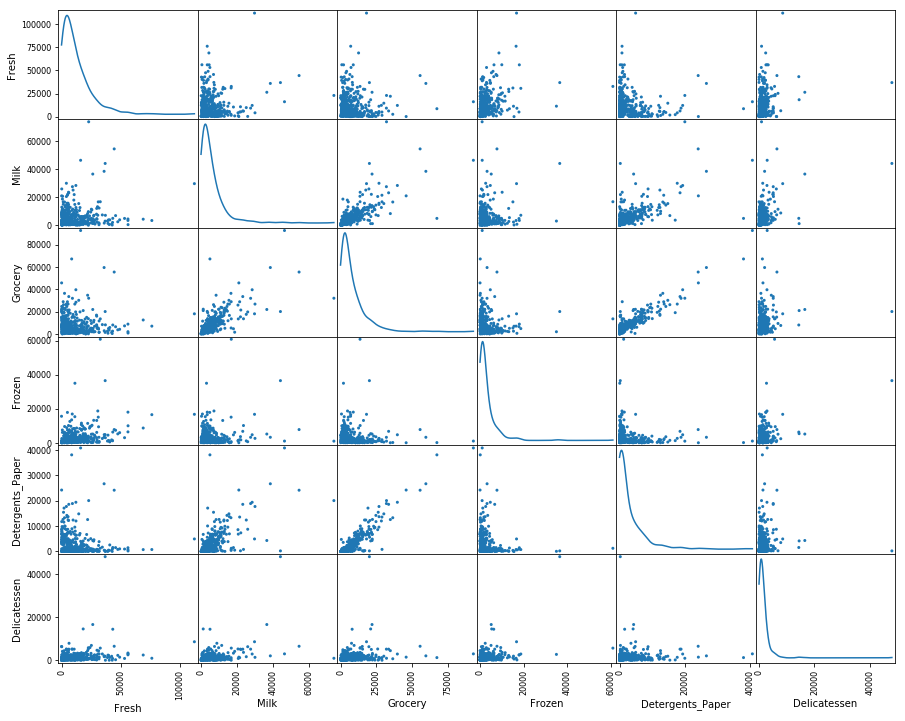

In [6]:
# TODO: Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 1, figsize = (15,12), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

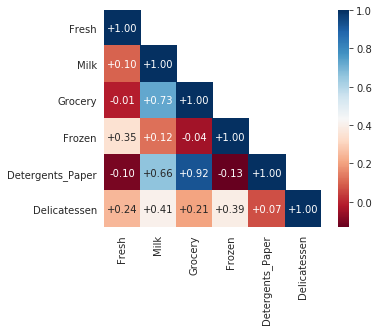

In [8]:
# TODO: Correlation Heatmap
import seaborn as sns
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.2f')


**Answer:** 
As discussed in the previous question Delicatessen is the most important feature to consider. Based on the scatter matrix and constructed heatmap we can see that 'Delicatessen' has the lowest average correlation to other features. It means it's the most necessary feature to consider the relevance.
Most of the data points in all of the scatter matrixes lie around zero and the distributions for all 6 features appear to be skewed right. Also, there is a high number of outliers in all of them. 
Strongest correlation is between 'Grocery' and 'Detergents_Paper' by which they kind of fit in a linear model.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\nahal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


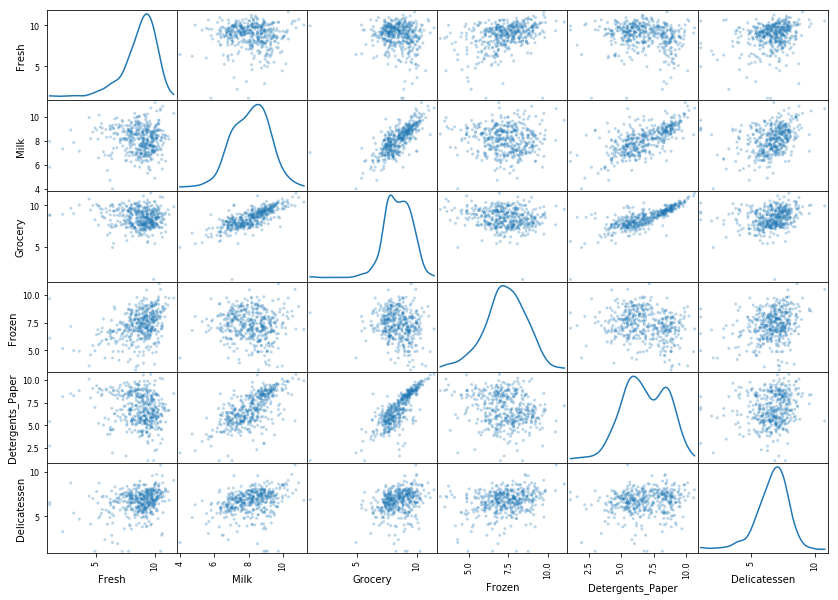

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# TODO: Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Implement code to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# TODO: Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.854612,7.926603,7.811568,9.088512,6.180017,7.903966
1,8.732627,8.958669,9.288874,7.075809,8.052933,7.585789
2,5.493061,9.468001,9.088399,6.683361,8.271037,5.351858


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
all_outliers = []
outliers = set()
# TODO: For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # TODO: Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers_per_feature = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for ol in  outliers_per_feature.index.tolist():
        if ol in all_outliers:
            outliers.add(ol)
        else:
            all_outliers.append(ol)
    display(outliers_per_feature)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = list(outliers)
print (outliers)

# TODO: Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Number of rows before deleting outliers: {}".format(data.shape[0]))
print("Number of outliers to delete: {}".format(len(outliers)))
print("Number of rows after deleting outliers: {}".format(good_data.shape[0]))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[128, 65, 66, 75, 154]
Number of rows before deleting outliers: 440
Number of outliers to delete: 5
Number of rows after deleting outliers: 435


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* These data points are outliers in more than one feature:

    65 for 'Fresh' and 'Frozen',
    
    66 for 'Fresh' and 'Delicatessen',
    
    75 for 'Detergent_Paper' and 'Grocery',
    
    128 for 'Fresh' and 'Delicatessen',
    
    154 for 'Milk' and 'Grocery'.
    

* I think these data points should be removed from the dataset because the outliers for more than one feature can manipulate the final prediction result and will reduce the predictive capability of our model.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

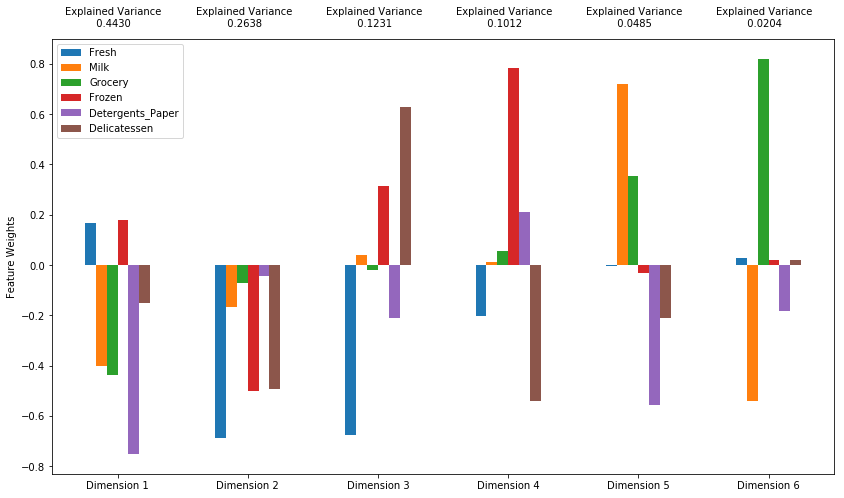

In [13]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# TODO: Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1. The first and second principal components explain 0.719 (0.44 + 0.27) of the variance in total. 
2. The first four components explain 0.9314 of the variance in total.
3. Each of the first four dimensions best represent:

    Dimension 1: 
    The variance of the data and the correlation between features in this component shows that there are some customers with high amount spending on purchasing "Detergents_Paper", "Grocery" and "Milk" while other customers spend very few amount on the other features. So, this pattern which is heavily relies on “Detergent_Paper”, “Grocery” and “Milk” can represent a customer with a more focus on non-food household items something like a retailer.

    Dimension 2:
    The variance of the data and the correlation between features in this component is almost the complementary to the first component by reducing the impact of “Milk”, “Grocery”, and “Detergents_Paper” and instead heavily relying on “Fresh”, “Frozen”, and “Delicatessen. So, this component can be a representative of customers with high spending on food stuff with less spending on non-food household items, something like a café or restaurants.

    Dimension 3:
    This dimension is highly focused on “Fresh” and “Delicatessen”, in the opposite correlation, such that an increase in one is correlated to the decrease of the other. This pattern can represent a small market or local deli.

    Dimension 4:
    This dimension is highly relied on “Frozen” and “Deli” with an opposite correlation for the two. This dimension could represent fast food chains or any other customer who mostly consume one of these specific types of foods.



### Observation
Implement code to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# TODO: Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1456,-2.1210,0.7147,0.3387,-0.3444,-0.2185
1,-1.8222,-0.5433,0.2567,-0.3523,0.0136,0.0142
2,-2.3804,2.8989,0.9016,1.2539,0.6757,-0.6118


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# TODO: Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Implement code to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [112]:
# TODO: Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1456,-2.1210
1,-1.8222,-0.5433
2,-2.3804,2.8989


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Impelement the code to produce a biplot of the reduced-dimension data.

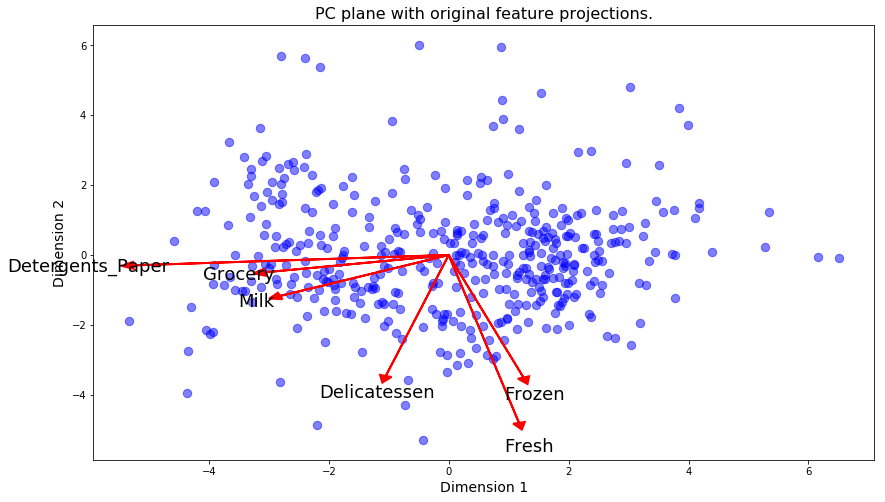

In [18]:
# TODO: Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**


* The major advantages of using the K-Means clustering algorithm are that it is easy to understand and implement. Also, If K is small, it can computationally be pretty fast even with a large number of features. It always converges and scales well to a large number of samples. However, since it is required to set the K value, sometimes it makes it difficult to best predict the K size. Moreover, the main focus is to minimize the distance within the same cluster which sometimes can lead to local minimization.


* Gaussian Mixture Model clustering algorithm is a more general case of the K-Means clustering. The most important advantage of this algorithm is its soft assignment capability which makes the model more flexible to the overlaps which make it possible for a point to belong to two different clusters. Also, it works well with different types of data distributions. GMM’s main disadvantages are it’s much more complicated to understand and implement. Also, it might not work well with high dimension datasets.


* I think both models should preform close for this problem, but my chosen algorithm is K-Means.
I tried GMM first, since I thought it would be a better model since due to its soft clustering ability, but then I thought since we saw in the PCA implementation that the first and second principal components explain 71.9% of the variance we can use a K-means clustering algorithm where the number of clusters is 2, and these were my result of implementing GMM and K-Means:

    K-Means Score: 0.4191
    GMM Score: 0.4103


* So, my chosen algorithm (K-Means) with 2 clusters did the job, too.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# TODO: Apply your clustering algorithm of choice to the reduced data
n_clusters = 2
for n_clusters in range (10, 2-1, -1):
    clusterer = KMeans(n_clusters, random_state = 1)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, random_state = 1)

    print ("Silhouette score for {} clusters is {}".format(n_clusters, score))


Silhouette score for 10 clusters is 0.3718160728725907
Silhouette score for 9 clusters is 0.3598790146053615
Silhouette score for 8 clusters is 0.3491861851091745
Silhouette score for 7 clusters is 0.3648753591099507
Silhouette score for 6 clusters is 0.36458888157918207
Silhouette score for 5 clusters is 0.3407500454228927
Silhouette score for 4 clusters is 0.33125652580240916
Silhouette score for 3 clusters is 0.3974234200078325
Silhouette score for 2 clusters is 0.42628101546910835


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* 2 clusters: 0.4191, 
* 3 clusters: 0.3943, 
* 4 clusters: 0.3302, 
* 5 clusters: 0.3478, 
* 6 clusters: 0.3601, 
* 7 clusters: 0.3641, 
* 8 clusters: 0.3416, 
* 9 clusters: 0.3516, 
* 10 clusters: 0.3653 

So, 2 clusters give us the best score.

### Cluster Visualiz
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you should now visualize the results. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

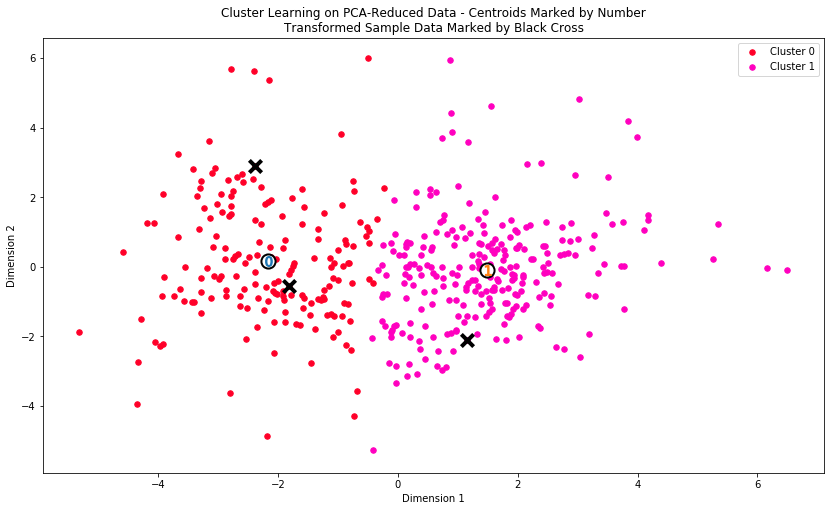

In [22]:
# TODO: Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [23]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# TODO: Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [24]:
# TODO: Statistical description of the dataset at the beginning of the projects
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

Comparing true_centers in each segment to the statistical description of the dataset, these segments sit as following for each of their features: 
1. Segment 0: 
	Fresh: between 25th and 50th percentile
	Milk: greater than 75th
	Grocery: greater than 75th
	Frozen: less than 25th
	Detergents_Paper: greater than 75th
	Delicatessen: just above 50th

    This information can represent a customer like a retailer or a supermarket with a more focus on non-food sells.

2.	Segment 1:
    Fresh: between 50th and 75th percentile
    Milk: between 25th and 50th percentile
    Grocery: between 25th and 50th percentile
    Frozen: between 50th and 75th percentile
    Detergents_Paper: between 25th and 50th percentile
    Delicatessen: between 25th and 50th percentile
	
    This information can represent a customer with a more focus on food sells, something like a café or restaurant.


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Implement code to find which cluster each sample point is predicted to be.

In [25]:
# TODO: Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

display(samples)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,19046,2770,2469,8853,483,2708
1,6202,7775,10817,1183,3143,1970
2,243,12939,8852,799,3909,211


**Answer:**

1.	Sample point 0 has more than 75th percentile for Fresh, somewhere between 25th and 50th for Milk, between 25th and 50th for Grocery, more than 75th for Frozen, between 25th and 50th for Detergents_Paper, and more than 75th for Delicattesen. So, based on the clusters description in Question 8, it makes sense for this sample point to be in the cluster 1 which represents a customer with a more focus on food sells, something like a café or restaurant.
 
2.	Sample point 1 falls somewhere between 25th and 50th percentile for Fresh, more than 75th for Milk, just above 75th for Grocery, between 25th and 50th for Frozen, between 50th and 75th for Detergents_Paper, and just above 75th for Delicattesen. So, based on the clusters description in Question 8, it makes more sense for this sample point to be categorized in the cluster 0 which represents a customer like retailor or a supermarket.


3.	Sample point 2 is less than 25th for Fresh, somewhere between 50th and 75th for Milk, between 50th and 75th for Grocery, between 25th and 50th for Frozen, close to 75th for Detergents_Paper, and less than 25th for Delicattesen. So, based on the clusters description in the Question 8 , it makes sense for this sample point to be in the cluster 1 which represents a customer like a supermarket with a more focus on non-food products.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* We can run A/B test by testing the change (5 days a week delivery to 3 days a week delivery) on a small proportion of each group, like 0.2 of each segment. Then we should track its impact of the company’s revenue by monitoring the patterns of the orders for each segment.

* For our two segments in this project I think it is more likely to have a greater negative effect on the second segment which are customers with a high amount of purchase of fresh item. This segment that can represent customers like cafes or restaurants probably expect their fresh ingredients like fruits or vegetables delivered every day.

* On the other hand, first segment with a more focus on grocery and detergents_paper and other non-fresh stuff like a supermarket might not care much about a little longer delivery time. So, probably this change doesn’t have a considerable negative impact on the company’s revenue.

* After these tests, we’ll be able to make a decision on whether or not to apply the change.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

* We can add the segment classification (cluster) as engineered feature to train to help a supervised learning model to make predictions.

* So, what the wholesale distributer can do in this technique is feeding back the customer segment data into the dataset and run the supervised learning model to train the data based on the customers’ spending of each product category while considering the cluster group as the target variable. This way the wholesale distributer will be able to make the prediction on the appropriate delivery service for new customers based on their assigned clusters.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Implement code to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

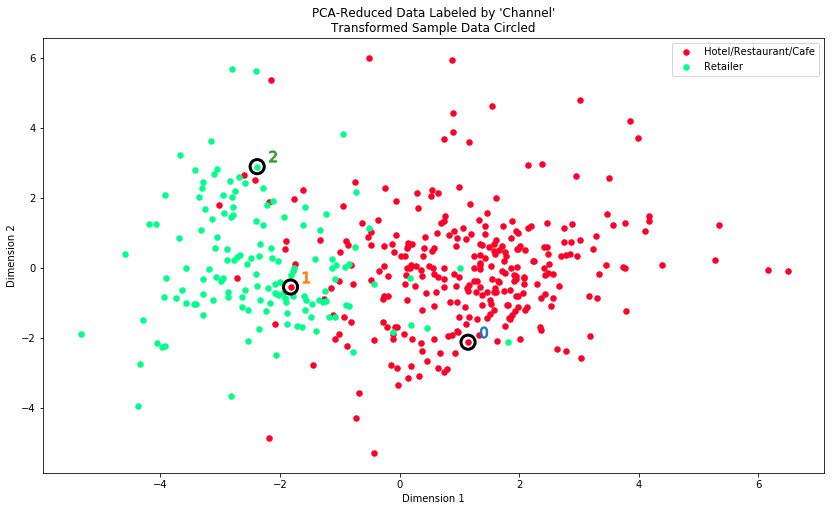

In [119]:
# TODO: Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

In my opinion, compared to the underlying distribution of ‘Hotels/Restaurants/Cafes’ customers to ‘Retailer’ customers, our K-Mean clustering algorithm has done a good job of classifying the datapoints in two clusters. However, there are some datapoints in our clustering that are classified unlike the underlying distributor. These diverse datapoints cause some overlaps in the customer segments and make the segments not to be classified as purely ‘Retailers’ or ‘Hotels/Restaurants/Cafes’ by this distribution. But I still believe these classifications are relatively consistent with our model’s definition of the customer segments.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.